##Outlier - rejection

Idea:
1. Train
2. Remove points with largest (residual) error (10%)
3. Train

#Mini Project

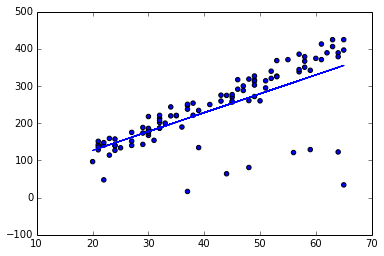

Coeff:  [ 6.73676836]
Intercept [-23.3372805]
r-square train:  0.393402776342
r-square test:  0.98634284573
None
outlierCleaner() is returning an empty list, no refitting to be done


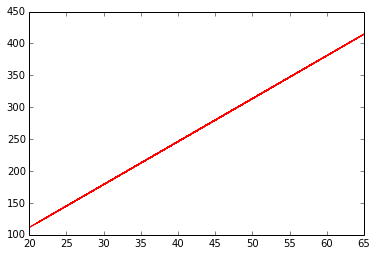

In [20]:
#!/usr/bin/python

import random
import numpy
import sys,os
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
sys.path.append('../ud120-projects/outliers')
sys.path.append("../tools/")
#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("../ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("../ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
    ### your code goes here!
    
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()
reg.fit(ages_test, net_worths_test)
plt.plot(ages_train, reg.predict(ages_train), color="r") 

print "Coeff: ",reg.coef_[0]
print "Intercept",reg.intercept_
print "r-square train: ",reg.score(ages_train, net_worths_train)
print "r-square test: ",reg.score(ages_test, net_worths_test)


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"



In [19]:
def outlierCleaner(predictions, ages, net_worths):
    """
        clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)

        return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error)
    """
    
    cleaned_data = []
    L = []
    ### your code goes here
    for p, n in zip(predictions, net_worths):
        L.append(p-n)
        
    sorted_list = L.sort()    
    print sorted_list
    return cleaned_data



Enron outliers

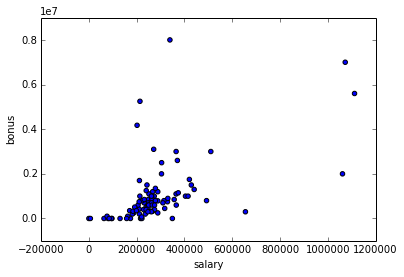

1111258.0


In [32]:
#!/usr/bin/python

import pickle
import sys,pprint
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../ud120-projects/final_project/final_project_dataset.pkl", "r") )
data_dict.pop( 'TOTAL' )
#pprint.pprint(data_dict)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

#pprint.pprint(data)
max_salary = 0
### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    max_salary = salary if salary > max_salary else max_salary
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


print max_salary

